# Unstructured Interpolation using `scipy`


This notebook uses examples from `scipy` documentation to demonstrate `HARK`'s `UnstructuredInterp` class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HARK.interpolation import UnstructuredInterp
from mpl_toolkits import mplot3d

Suppose we have a collection of values for an unknown function along with their respective coordinate points. For illustration, assume the values come from the following function:


In [2]:
def func(x, y):
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y**2) ** 2

The points are randomly scattered in the unit square and therefore have no regular structure.


In [3]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 1000))
values = func(rand_x, rand_y)

Now suppose we would like to interpolate this function on a rectilinear grid, which is known as "regridding".


In [4]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

To do this, we use `HARK`'s `UnstructuredInterp` class. The class takes the following arguments:

- `values`: an ND-array of values for the function at the points
- `grids`: a list of ND-arrays of coordinates for the points
- `method`: the interpolation method to use, with options "nearest", "linear", "cubic" (for 2D only), and "rbf". The default is `'linear'`.


In [5]:
nearest_interp = UnstructuredInterp(values, (rand_x, rand_y), method="nearest")
linear_interp = UnstructuredInterp(values, (rand_x, rand_y), method="linear")
cubic_interp = UnstructuredInterp(values, (rand_x, rand_y), method="cubic")
rbf_interp = UnstructuredInterp(values, (rand_x, rand_y), method="rbf")

Once we create the interpolator objects, we can use them using the `__call__` method which takes as many arguments as there are dimensions.


In [6]:
nearest_grid = nearest_interp(grid_x, grid_y)
linear_grid = linear_interp(grid_x, grid_y)
cubic_grid = cubic_interp(grid_x, grid_y)
rbf_grid = rbf_interp(grid_x, grid_y)

Now we can compare the results of the interpolation with the original function. Below we plot the original function and the sample points that are known.


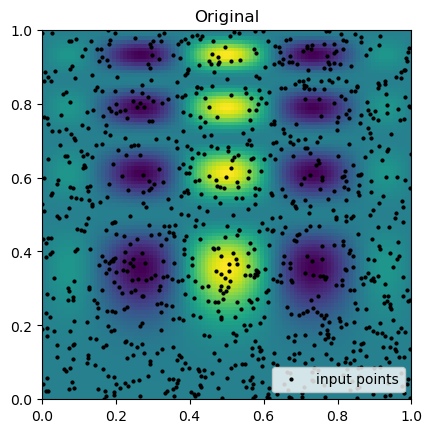

In [7]:
plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")

Then, we can look at the result for each method of interpolation and compare it to the original function.


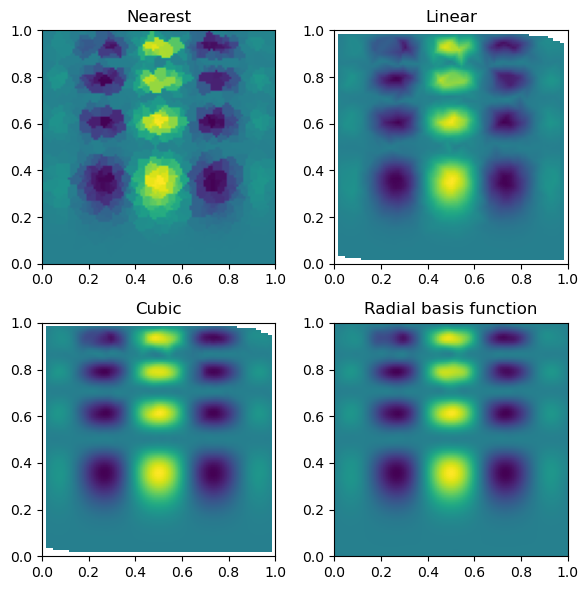

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
titles = ["Nearest", "Linear", "Cubic", "Radial basis function"]
grids = [nearest_grid, linear_grid, cubic_grid, rbf_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 1, 0, 1), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Another Example


In [9]:
rng = np.random.default_rng(0)
rand_x = rng.random(20) - 0.5
rand_y = rng.random(20) - 0.5
values = np.hypot(rand_x, rand_y)
grid_x = np.linspace(min(rand_x), max(rand_x))
grid_y = np.linspace(min(rand_y), max(rand_y))
grid_x, grid_y = np.meshgrid(grid_x, grid_y)  # 2D grid for interpolation

In [10]:
nearest_interp = UnstructuredInterp(values, (rand_x, rand_y), method="nearest")
linear_interp = UnstructuredInterp(values, (rand_x, rand_y), method="linear")
cubic_interp = UnstructuredInterp(values, (rand_x, rand_y), method="cubic")
rbf_interp = UnstructuredInterp(values, (rand_x, rand_y), method="rbf")

In [11]:
nearest_grid = nearest_interp(grid_x, grid_y)
linear_grid = linear_interp(grid_x, grid_y)
cubic_grid = cubic_interp(grid_x, grid_y)
rbf_grid = rbf_interp(grid_x, grid_y)

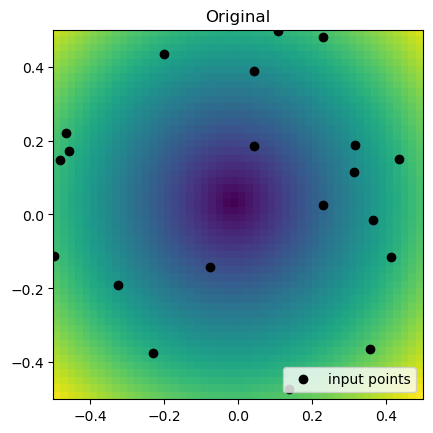

In [12]:
plt.imshow(np.hypot(grid_x, grid_y).T, extent=(-0.5, 0.5, -0.5, 0.5), origin="lower")
plt.plot(rand_x, rand_y, "ok", label="input points")
plt.title("Original")
plt.legend(loc="lower right")

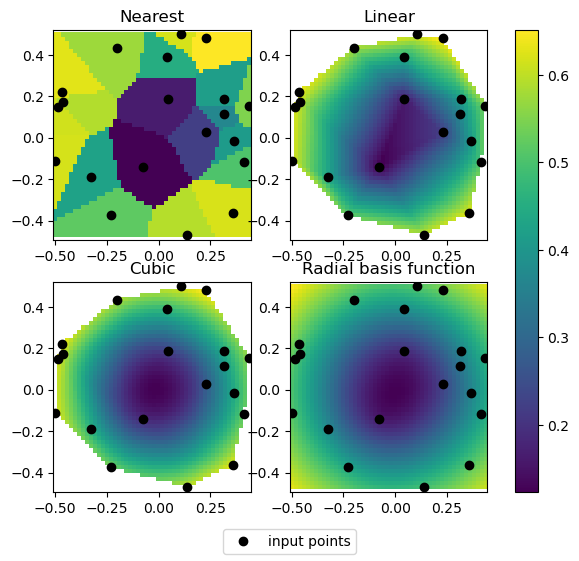

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6))
titles = ["Nearest", "Linear", "Cubic", "Radial basis function"]
grids = [nearest_grid, linear_grid, cubic_grid, rbf_grid]

for i, (ax, title, grid) in enumerate(zip(axs.flat, titles, grids)):
    im = ax.pcolormesh(grid_x, grid_y, grid, shading="auto")
    pts = ax.plot(rand_x, rand_y, "ok", label="input points")
    ax.set_title(title)

fig.legend(handles=pts, loc="lower center")
cbar = fig.colorbar(im, ax=axs)
for ax in axs.flat:
    ax.axis("equal")

plt.show()

# Unstructured Interpolators with Rectilinear Grids


In [14]:
def F(u, v):
    return u * np.cos(u * v) + v * np.sin(u * v)

In [15]:
rand_x, rand_y = np.meshgrid(
    np.linspace(0, 3, 10), np.linspace(0, 3, 10), indexing="ij"
)
values = F(rand_x, rand_y)

In [16]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 3, 100), np.linspace(0, 3, 100), indexing="ij"
)

In [17]:
methods = ["nearest", "linear", "cubic", "rbf"]
nearest_interp, linear_interp, cubic_interp, rbf_interp = [
    UnstructuredInterp(values, (rand_x, rand_y), method=method) for method in methods
]

In [18]:
interp_funcs = [nearest_interp, linear_interp, cubic_interp, rbf_interp]
nearest_grid, linear_grid, cubic_grid, rbf_grid = [
    interp_func(grid_x, grid_y) for interp_func in interp_funcs
]

Text(0.5, 1.0, 'Original')

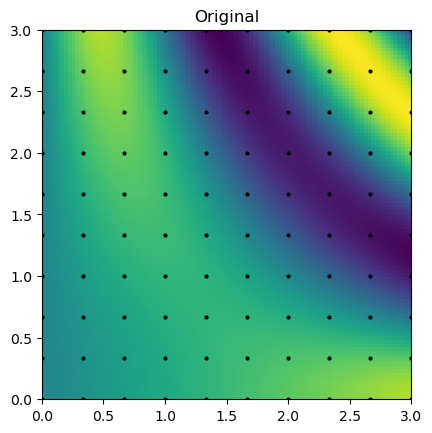

In [19]:
plt.imshow(F(grid_x, grid_y).T, extent=(0, 3, 0, 3), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2)
plt.title("Original")

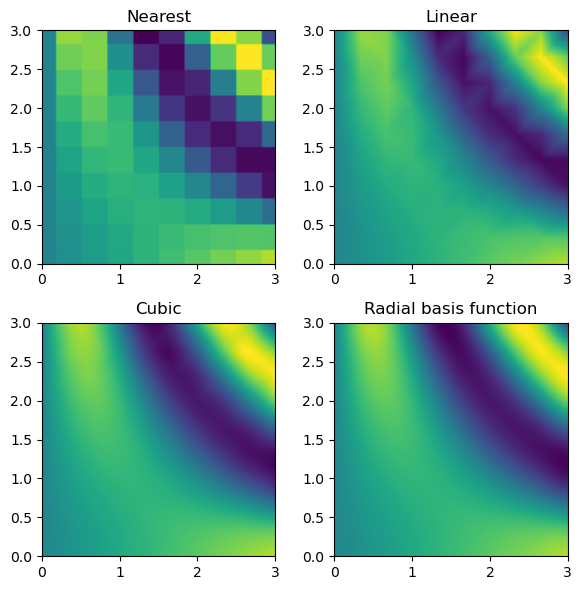

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
titles = ["Nearest", "Linear", "Cubic", "Radial basis function"]
grids = [nearest_grid, linear_grid, cubic_grid, rbf_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 3, 0, 3), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# More complex functions


In [21]:
def f_d(*args):
    return np.maximum(
        0.0,
        1.0
        - np.exp(0.5 - np.prod(np.asarray(args) + 0.2, axis=0) ** (1.0 / len(args))),
    )

In [22]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 500))
values = f_d(rand_x, rand_y)

In [23]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 50), np.linspace(0, 1, 50), indexing="ij"
)

In [24]:
nearest_interp = UnstructuredInterp(values, (rand_x, rand_y), method="nearest")
linear_interp = UnstructuredInterp(values, (rand_x, rand_y), method="linear")
cubic_interp = UnstructuredInterp(values, (rand_x, rand_y), method="cubic")
rbf_interp = UnstructuredInterp(values, (rand_x, rand_y), method="rbf")

In [25]:
original_grid = f_d(grid_x, grid_y)
nearest_grid = nearest_interp(grid_x, grid_y)
linear_grid = linear_interp(grid_x, grid_y)
cubic_grid = cubic_interp(grid_x, grid_y)
rbf_grid = rbf_interp(grid_x, grid_y)

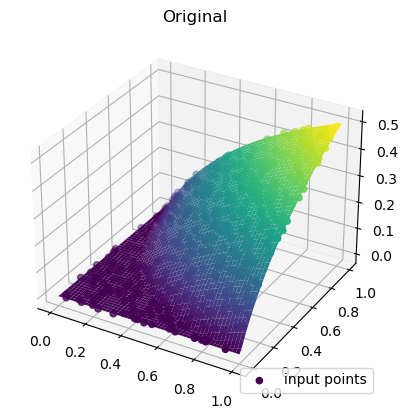

In [26]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    original_grid,
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
plt.title("Original")
plt.legend(loc="lower right")

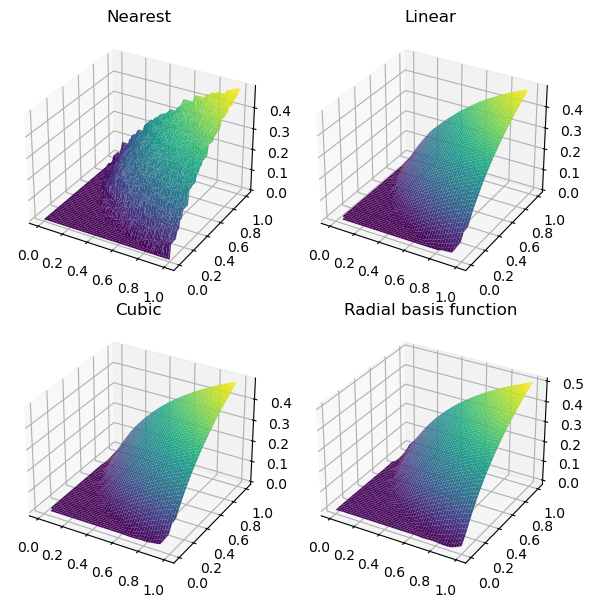

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), subplot_kw={"projection": "3d"})
titles = ["Nearest", "Linear", "Cubic", "Radial basis function"]
grids = [nearest_grid, linear_grid, cubic_grid, rbf_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [28]:
def f_d(x, y):
    return 1 / (np.abs(0.5 - x**4 - y**4) + 0.1)

In [29]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 1000))
values = f_d(rand_x, rand_y)

In [30]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

In [31]:
nearest_interp = UnstructuredInterp(values, (rand_x, rand_y), method="nearest")
linear_interp = UnstructuredInterp(values, (rand_x, rand_y), method="linear")
cubic_interp = UnstructuredInterp(values, (rand_x, rand_y), method="cubic")
rbf_interp = UnstructuredInterp(values, (rand_x, rand_y), method="rbf")

In [32]:
original_grid = f_d(grid_x, grid_y)
nearest_grid = nearest_interp(grid_x, grid_y)
linear_grid = linear_interp(grid_x, grid_y)
cubic_grid = cubic_interp(grid_x, grid_y)
rbf_grid = rbf_interp(grid_x, grid_y)

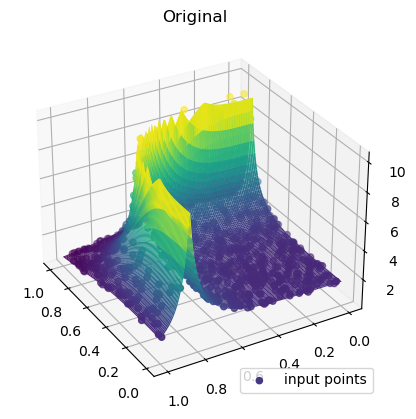

In [33]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    original_grid,
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
ax.view_init(30, 150)
plt.title("Original")
plt.legend(loc="lower right")

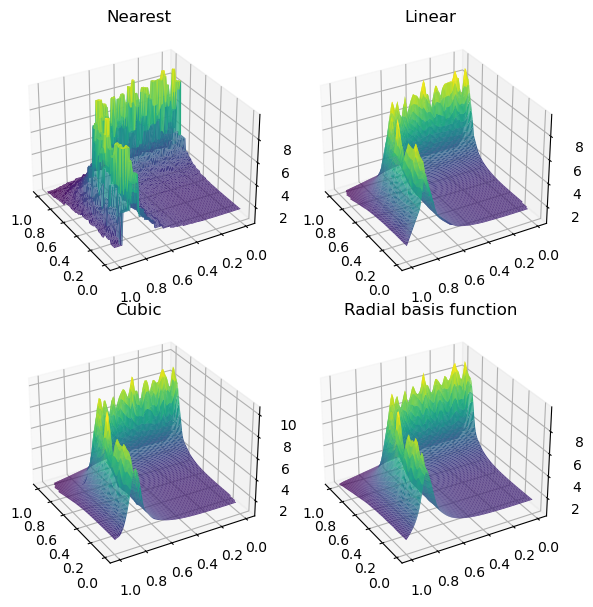

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), subplot_kw={"projection": "3d"})
titles = ["Nearest", "Linear", "Cubic", "Radial basis function"]
grids = [nearest_grid, linear_grid, cubic_grid, rbf_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)
    ax.view_init(30, 150)


plt.tight_layout()
plt.show()